### Results Expected
##### Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 

Present the overall approach of the analysis in a presentation: 

1. Mention the problem statement and the analysis approach briefly 
2. Explain the results of univariate, bivariate analysis etc. in business terms
3. Include visualisations and summarise the most important results in the presentation

### Business Understanding
##### Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

##### When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    a. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
 
     b. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    c. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2.Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Problem Statement

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

1. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

2. Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.width', None,'display.max_colwidth', None)

In [119]:
# READ COLUMNS
df=pd.read_csv('loan.csv')

C:\Users\sajal\AppData\Local\Temp\ipykernel_3816\3502384094.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [120]:
# READ COLUMNS DESCRIPTIONS
df_columns=pd.read_csv('loan_columns.csv')
df_columns.head(5)

,column,column_description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


# Data understanding  

#### dataframe information

In [121]:
pd.set_option('display.max_columns', None)
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [122]:
# description about dataframe columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [123]:
# information about dataframe
df.info(verbose=True,memory_usage=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [127]:
# shape and size of dataframes
df.shape,df.size
print(f"""
rows: {df.shape[0]}
columns: {df.shape[1]}
""")


rows: 39717
columns: 111



### null values

In [128]:
# null values percentage in columns
(df.isnull().sum()/df.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

##### Notes:
1. some columns have 100% null values. 
2. remove columns from dataframe having more than 30% null values.

In [136]:
# columns having more than 30% null values
reject_columns = df.columns[(df.isnull().sum()/df.shape[0])*100 > 30.0]
print("total columns to be rejected (having more than 30% null values):",len(reject_columns))

total columns to be rejected (having more than 30% null values): 58


_________________________________

##### removing columns with null values percentage > 30%

In [137]:
# updating the same datafranme by dropping rejected columns
df=df.drop(columns=reject_columns)

In [139]:
# updated dataframe
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [140]:
# new shape and size of dataframe
print(f"rows:{df.shape[0]}  | columns:{df.shape[1]}")

rows:39717  | columns:53


In [142]:
# finding continuos and categorical variables
continuos_variables=[column for column in df.columns if df[column].dtype in ['int64','float64']] # integers and floats
categorical_variables=[column for column in df.columns if df[column].dtype=='object'] # objects

print(f"""
continuous variables: {len(continuos_variables)}
categorical variables: {len(categorical_variables)}
""")


continuous variables: 31
categorical variables: 22



---------------------

### continuous variables

In [152]:
# total number of continuous variables
print("continuos variables:",len(continuos_variables))

continuos variables: 26


In [143]:
# continuous varibles columns informations
df_columns[df_columns['column'].isin(continuos_variables)]

,column,column_description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
4,annual_inc,The self-reported annual income provided by the borrower during registration.
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
16,dti,"A ratio calculated using the borrower�s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower�s self-reported monthly income."
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.


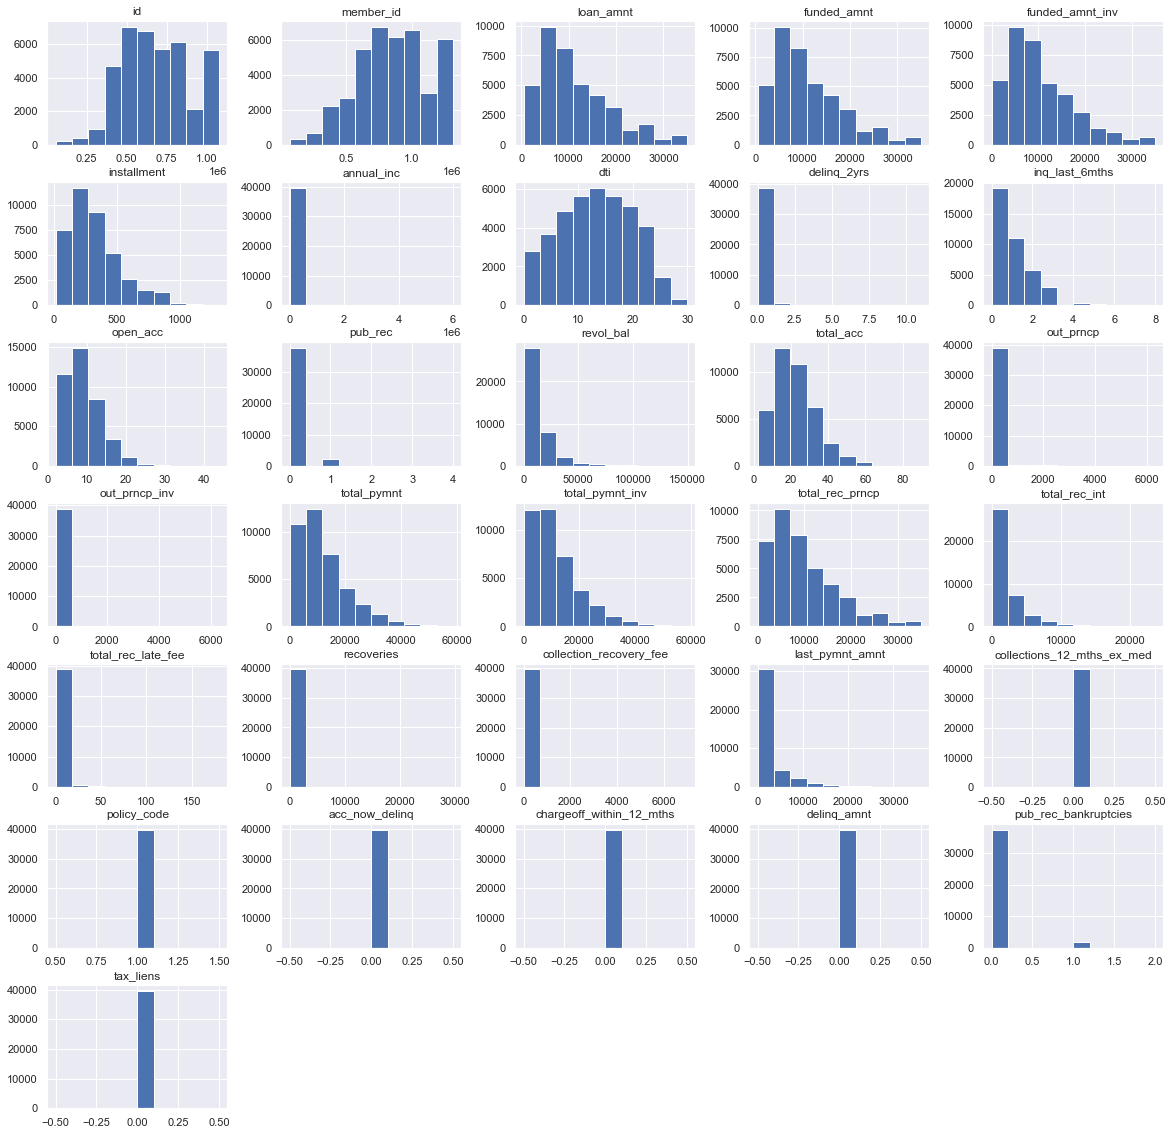

In [17]:
# histogram plot for continuos variables
df.loc[:,continuos_variables].hist(figsize=(20,20),layout=(7,5))
plt.show()

##### Notes:
1. most of the columns have almost or completely0 values.
<br>
e.g.: collections_12_mths_ex_med, tax_liens, etc.
2. remove columns having 0 as a value.

In [144]:
# find continuos columns with only zero values
zerovalue_columns=[column for column in df.loc[:,continuos_variables].columns if df.loc[:,continuos_variables][column].sum()==0]
print("columns with 0 as only value:",zerovalue_columns)

columns with 0 as only value: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [147]:
# drop columns with only zero columns
df=df.drop(columns=zerovalue_columns)

In [148]:
# updated dataframe
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0


In [149]:
# update continuos variable list
continuos_variables=[column for column in continuos_variables if column not in zerovalue_columns]
print(f"continuos variables: {len(continuos_variables)}")

continuos variables: 26


In [150]:
# new shape and size of dataframe
print(f"rows:{df.shape[0]}  | columns:{df.shape[1]}")

rows:39717  | columns:48


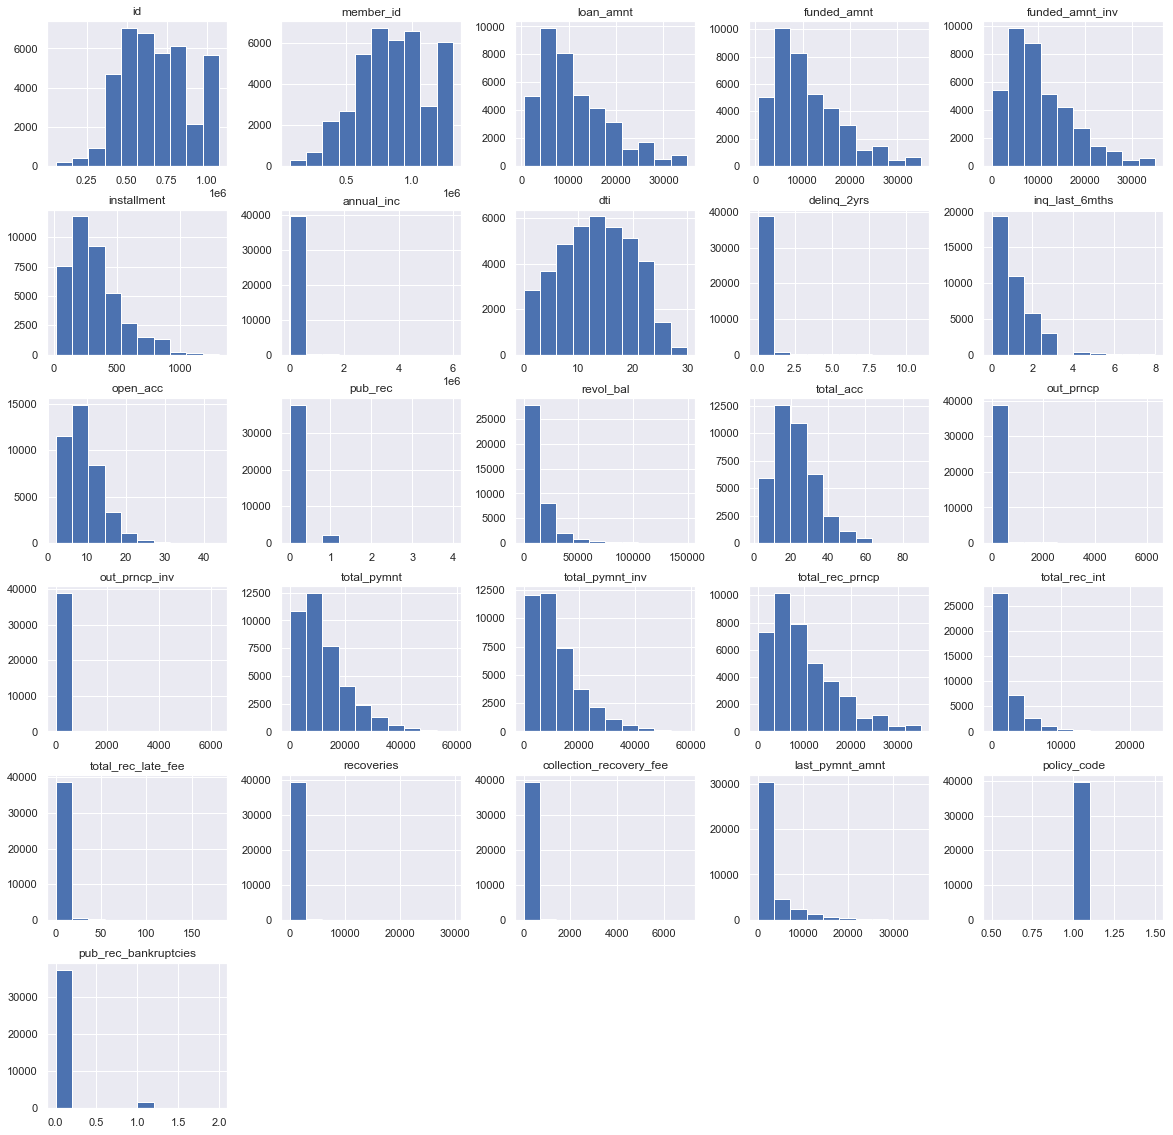

In [151]:
# histogram plot for continuos variables
df.loc[:,continuos_variables].hist(figsize=(20,20),layout=(6,5))
plt.show()

### categorical variables

In [153]:
# total categorical variables
print("categorical variables:", len(categorical_variables))

categorical variables: 22


In [156]:
# continuous varibles columns informations
df_columns[df_columns['column'].isin(categorical_variables)]

,column,column_description
2,addr_state,The state provided by the borrower in the loan application
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
25,grade,LC assigned loan grade
26,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
29,initial_list_status,"The initial listing status of the loan. Possible values are � W, F"
34,int_rate,Interest Rate on the loan
35,issue_d,The month which the loan was funded


In [157]:
# categorical variables segmentaion --> less or more than 10 values types
categorical_variables_less_10values=[column for column in categorical_variables if len(df[column].value_counts().index)<=10]
categorical_variables_more_10values=[column for column in categorical_variables if len(df[column].value_counts().index)>10]

print(f"""categorical columns--->
less than or 10 values : {len(categorical_variables_less_10values)}
more than 10 values : {len(categorical_variables_more_10values)}
""")

categorical columns--->
less than or 10 values : 8
more than 10 values : 14



###### function to plot categorical columns plot

In [183]:
# create function to plot categorical columns plot --> frequency plot
def categorical_column_plot(column_name):
    '''plot for columns'''
    # if values types number less than or equal to 10
    if len(df[column_name].value_counts().index)<=10:
#         -- plot
        df[column_name].value_counts().plot(kind='barh',title=column_name)
        plt.show()
#         -- information
        print(f"""
        column -- {column_name}: {list(df_columns[df_columns['column']==column_name]['column_description'])[0]}
        """)
        # if only one value type is in column
        if len(df[column_name].value_counts().index)==1:
            print(" -- only one value type -- ")
    # if value type number more than 10
    else:
        # if value type numbers is below 100
        if len(df[column_name].value_counts().index)<100:
#         -- plot
            df[column_name].value_counts().plot(kind='pie')
            plt.show()
#         -- information
            print(f"""
            column -- {column_name} : {list(df_columns[df_columns['column']==column_name]['column_description'])[0]}
            types -- {len(df[column_name].value_counts().index)}
            values(top 5) -- {list(df[column_name].value_counts().index[:5])}
            """)
    # if value type numbers exceeds 100
        else:
#          -- information
            print(f"""
            column -- {column_name} : {list(df_columns[df_columns['column']==column_name]['column_description'])[0]}
            types -- {len(df[column_name].value_counts().index)}
            values(top 5) -- {list(df[column_name].value_counts().index[:5])}
            """)

##### analysis on categorical variables with less than or equals to 10 value types

In [171]:
# categorical values with less than or 10 value types
print("categorical values with less than or 10 value types:",len(categorical_variables_less_10values))

categorical values with less than or 10 value types: 8


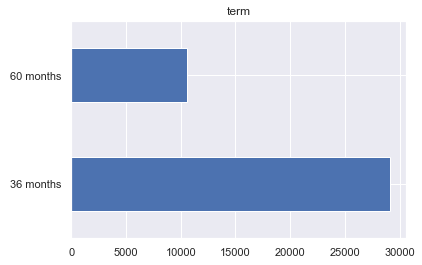


        column -- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
        


In [172]:
# term
categorical_column_plot('term')

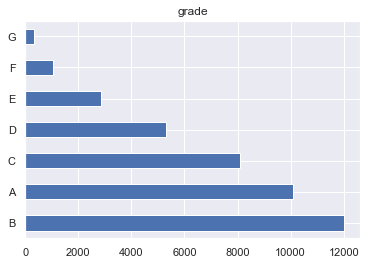


        column -- grade: LC assigned loan grade
        


In [173]:
# grade
categorical_column_plot('grade')

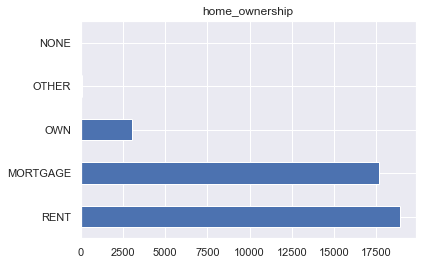


        column -- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
        


In [174]:
# home ownership
categorical_column_plot('home_ownership')

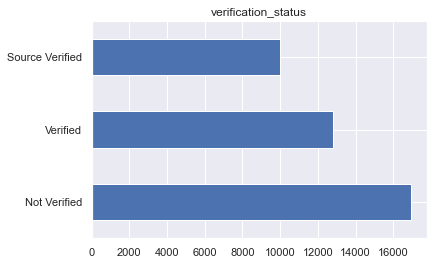


        column -- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
        


In [175]:
# verfication status
categorical_column_plot('verification_status')

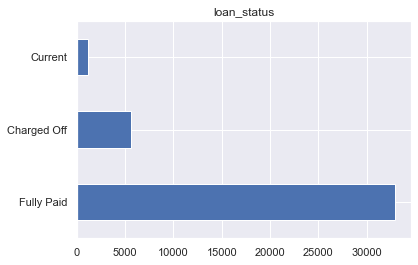


        column -- loan_status: Current status of the loan
        


In [176]:
# loan status
categorical_column_plot('loan_status')

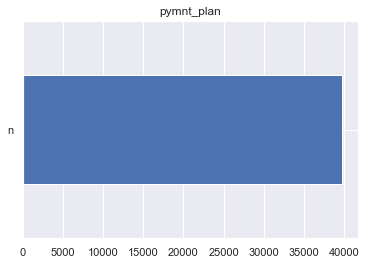


        column -- pymnt_plan: Indicates if a payment plan has been put in place for the loan
        
 -- only one value type -- 


In [177]:
# payment plan
categorical_column_plot('pymnt_plan')

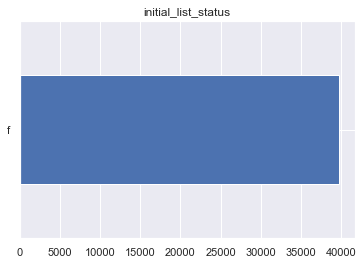


        column -- initial_list_status: The initial listing status of the loan. Possible values are � W, F
        
 -- only one value type -- 


In [178]:
# list status
categorical_column_plot('initial_list_status')

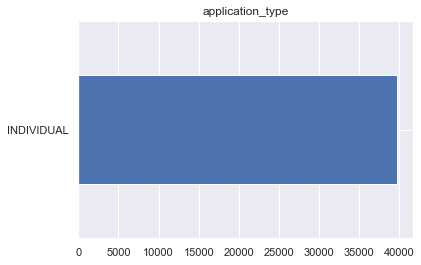


        column -- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
        
 -- only one value type -- 


In [179]:
# application type
categorical_column_plot('application_type')

##### Notes:
1. application type, list status, and payment plan columns have only one value types.
2. term column can be converted to integer columns.

##### analysis on categorical variables with more than to 10 value types

In [184]:
# categorical values with more than 10 value types
print("categorical values with more than 10 value types:",len(categorical_variables_more_10values))

categorical values with more than 10 value types: 14


In [185]:
# interest rate
categorical_column_plot('int_rate')


            column -- int_rate : Interest Rate on the loan
            types -- 371
            values(top 5) -- ['10.99%', '13.49%', '11.49%', '7.51%', '7.88%']
            


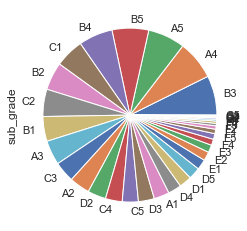


            column -- sub_grade : LC assigned loan subgrade
            types -- 35
            values(top 5) -- ['B3', 'A4', 'A5', 'B5', 'B4']
            


In [186]:
# sub grades
categorical_column_plot('sub_grade')

In [187]:
# employee title
categorical_column_plot('emp_title')


            column -- emp_title : The job title supplied by the Borrower when applying for the loan.*
            types -- 28820
            values(top 5) -- ['US Army', 'Bank of America', 'IBM', 'AT&T', 'Kaiser Permanente']
            


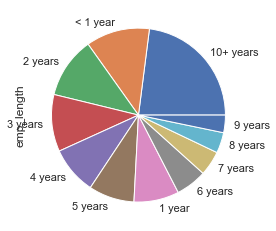


            column -- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
            types -- 11
            values(top 5) -- ['10+ years', '< 1 year', '2 years', '3 years', '4 years']
            


In [188]:
# employee length
categorical_column_plot('emp_length')

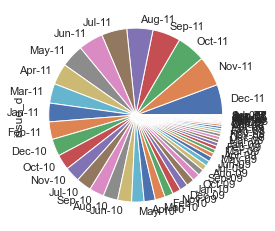


            column -- issue_d : The month which the loan was funded
            types -- 55
            values(top 5) -- ['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11']
            


In [189]:
# issue date
categorical_column_plot('issue_d')

In [190]:
# url address
categorical_column_plot('url')


            column -- url : URL for the LC page with listing data.
            types -- 39717
            values(top 5) -- ['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501', 'https://lendingclub.com/browse/loanDetail.action?loan_id=568534', 'https://lendingclub.com/browse/loanDetail.action?loan_id=568659', 'https://lendingclub.com/browse/loanDetail.action?loan_id=567165', 'https://lendingclub.com/browse/loanDetail.action?loan_id=568531']
            


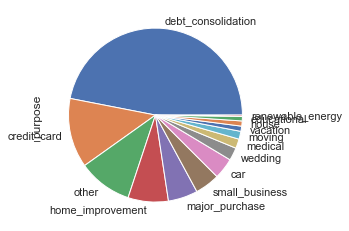


            column -- purpose : A category provided by the borrower for the loan request. 
            types -- 14
            values(top 5) -- ['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase']
            


In [191]:
# loan purpose
categorical_column_plot('purpose')

In [192]:
# loan title
categorical_column_plot('title')


            column -- title : The loan title provided by the borrower
            types -- 19615
            values(top 5) -- ['Debt Consolidation', 'Debt Consolidation Loan', 'Personal Loan', 'Consolidation', 'debt consolidation']
            


In [193]:
# zip codes
categorical_column_plot('zip_code')


            column -- zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
            types -- 823
            values(top 5) -- ['100xx', '945xx', '112xx', '606xx', '070xx']
            


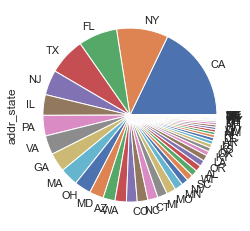


            column -- addr_state : The state provided by the borrower in the loan application
            types -- 50
            values(top 5) -- ['CA', 'NY', 'FL', 'TX', 'NJ']
            


In [194]:
# address states
categorical_column_plot('addr_state')

In [195]:
# earliest credit line
categorical_column_plot('earliest_cr_line')


            column -- earliest_cr_line : The month the borrower's earliest reported credit line was opened
            types -- 526
            values(top 5) -- ['Nov-98', 'Oct-99', 'Dec-98', 'Oct-00', 'Dec-97']
            


In [196]:
# revolving utilization
categorical_column_plot('revol_util')


            column -- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
            types -- 1089
            values(top 5) -- ['0%', '0.20%', '63%', '40.70%', '66.70%']
            


In [197]:
# last payment date
categorical_column_plot('last_pymnt_d')


            column -- last_pymnt_d : Last month payment was received
            types -- 101
            values(top 5) -- ['May-16', 'Mar-13', 'Dec-14', 'May-13', 'Feb-13']
            


In [198]:
# last credit pulled
categorical_column_plot('last_credit_pull_d')


            column -- last_credit_pull_d : The most recent month LC pulled credit for this loan
            types -- 106
            values(top 5) -- ['May-16', 'Apr-16', 'Mar-16', 'Feb-13', 'Feb-16']
            


##### Notes:
1. some object columns can be converted to integer/float columns.
2. some object columns can be converted to date-time columns.
3. two columns have similar values.
4. zip code column can be integer.
5. url column can have only id and entire web domain address can be saved as metadata.

# Data Manipulation

## Value Transformation

### Type Conversion

##### Continuous variables

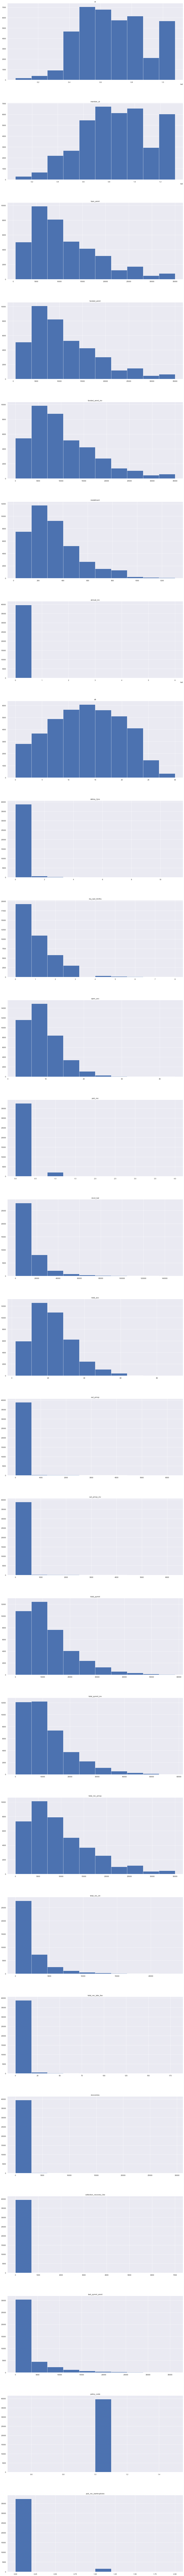

In [229]:
# histogram plot for continuos variables
df.loc[:,continuos_variables].hist(figsize=(20,300),layout=(26,1))
plt.show()

##### Notes:
1. For continuous variable columns, only outlier detection and removal has to be done.

##### Categorical variables

In [279]:
# function to rename column and apply tranformation on values
def column_transformation(data,column_name,new_column_name,function):
    global df_columns
    '''
    data: dataframe
    column_name: column old name
    new_column_name: column new name
    function: function for transformation
    '''
    # rename column in main dataframe
    data.rename(columns={column_name:new_column_name},inplace=True)
    # rename column in column information table
    df_columns.rename(columns={column_name:new_column_name},inplace=True)
    # apply transformation
    data[new_column_name]=data[new_column_name].apply(function)
    return data[new_column_name].value_counts()

1. term column

In [284]:
df['term'].value_counts()

36 months    29096
60 months    10621
Name: term, dtype: int64

In [285]:
# apply transformation --> remove 'months' name string and keep as integer
column_transformation(df,'term','term_months',lambda x: int(x[:2]))

36    29096
60    10621
Name: term_months, dtype: int64

2. interest rate

In [291]:
df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [296]:
# apply transformation --> remove 'percentage' symbol string and keep as float
column_transformation(df,'interest_rates','interest_rates',lambda x: float(x[:-1]))

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: interest_rates, Length: 371, dtype: int64

3. employement length

In [363]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [354]:
# apply transformation --> remove 'years' name string, convert '<1' to '1' and '10+' to 10
column_transformation(df,'employee_length','emp_length',lambda x: x)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [301]:
categorical_variables

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [53]:
#### slicing

In [54]:
#### modificaiton

### Missing Values Operations

In [55]:
#### Removal

In [56]:
#### Filling

### outliers

### Inconsistent Values

# Data analysis

In [57]:
# plots

In [58]:
# boxplot

In [59]:
# scatter plot, correlation matrix

In [60]:
## univariate analysis

In [61]:
# target variabe--loan status, grade, sub-grade

# Presentation and Recommendations 